## 0: Section Overview

In the following documentation, we will investigate the use of Nearest Neighbor methods to address regression problems. We want to evaluate the performance of this more sophisticated model against the baseline linear regression model using our chosen performance metric of MSE.

## 1: Necessary Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import Ridge

## 2: Data Access

In [3]:
test_file_path = '~/University/bristol/year_4/DataScienceToolbox/Assessment1/Datasets/test.xlsx'
train_file_path = '~/University/bristol/year_4/DataScienceToolbox/Assessment1/Datasets/train.xlsx'
test_data = pd.read_excel(test_file_path)
train_data = pd.read_excel(train_file_path)

## 3: Implementing the KNN model

First we will consider a K-Nearest Neighbor model where k = 5. In the following code we will select the features and our target variable to be the independent and dependent variables for our KNN model. We will then scale the independent variables using the standard scaler. The features we are choosing are: 'Mean_Stringency_Index', 'CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index', 'days_since', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', and the target variable is 'reproduction_rate'.

In [4]:
indep_train = train_data[['Mean_Stringency_Index', 'CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index', 'days_since', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dep_train = train_data['reproduction_rate']
indep_test = test_data[['Mean_Stringency_Index', 'CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index', 'days_since', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dep_test = test_data['reproduction_rate']

# Knn models are distance based, so scaling of features is essential

scaler = StandardScaler()

# We apply the function fit_transform to the training data which chooses model parameters according to the mean and standard deviation
# We apply simply the transform function to the test data since the model parameters have already been chosen

indep_scaled_train = scaler.fit_transform(indep_train)
indep_scaled_test = scaler.transform(indep_test)

Now we will use KNeighborsRegressor package from sklearn to apply the KNN model. 

In [8]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

# Now we will test the performance of our model

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=5: {mse}')

Mean Squared Error for k=5: 0.23052381536184516


We can see that the MSE is 0.2305 which we will use as a baseline. We will now try to improve our model performance by adjusting the number of neighbors and will create a scatter graph to visualise our model performance.

## 4: Model visualisation

### 4.1: Scatter Plot

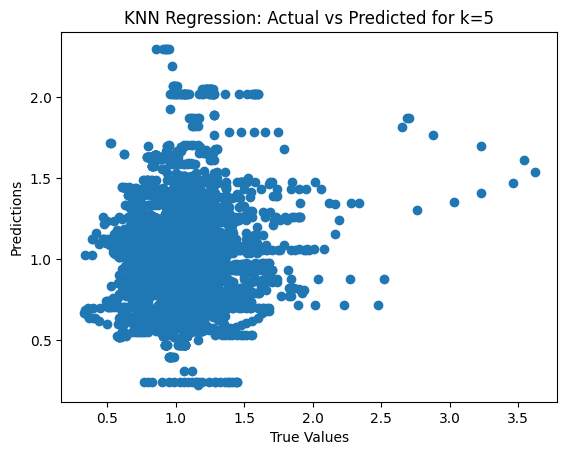

In [110]:
plt.scatter(dep_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("KNN Regression: Actual vs Predicted for k=5")
plt.show()

While the graph shows a roughly positive correlation, the points are concentrated around the lower true values, suggesting that the KNN model might be struggling to make accurate predictions, particularly when the true values are higher. Equally, the fact that the points don't lie close to the diagonal line implies prediction errors. The first improvement we are going to make is to try different values of k.

In [6]:
# KNN model for k=6
knn6 = KNeighborsRegressor(n_neighbors=6)
knn6.fit(indep_scaled_train, dep_train)
prediction6 = knn6.predict(indep_scaled_test)
mse6 = mean_squared_error(dep_test, prediction6)
print(f'Mean Squared Error for k=6: {mse6}')

# KNN model for k=8
knn8 = KNeighborsRegressor(n_neighbors=8)
knn8.fit(indep_scaled_train, dep_train)
prediction8 = knn8.predict(indep_scaled_test)
mse8 = mean_squared_error(dep_test, prediction8)
print(f'Mean Squared Error for k=8: {mse8}')

# KNN model for k=10
knn10 = KNeighborsRegressor(n_neighbors=10)
knn10.fit(indep_scaled_train, dep_train)
prediction10 = knn10.predict(indep_scaled_test)
mse10 = mean_squared_error(dep_test, prediction10)
print(f'Mean Squared Error for k=10: {mse10}')

# KNN model for k=12
knn12 = KNeighborsRegressor(n_neighbors=12)
knn12.fit(indep_scaled_train, dep_train)
prediction12 = knn12.predict(indep_scaled_test)
mse12 = mean_squared_error(dep_test, prediction12)
print(f'Mean Squared Error for k=12: {mse12}')

Mean Squared Error for k=6: 0.22780715210755142
Mean Squared Error for k=8: 0.22068196743663474
Mean Squared Error for k=10: 0.21319850177299496
Mean Squared Error for k=12: 0.2083269186889088


As we can see, the MSE decreases as k increases, indicating that the predictions are becoming more accurate. This could be because larger k reduces overfitting, by reducing the influence of individual noisy data points. Increasing k can often result in a higher bias, but lower variance, though the decrease in MSE here indicates that the model is finding a better bias-variance balance. We will also plot graphs of the residuals to help us to visualise if the model is over or under-fitting.

### 4.2: Residuals Plot

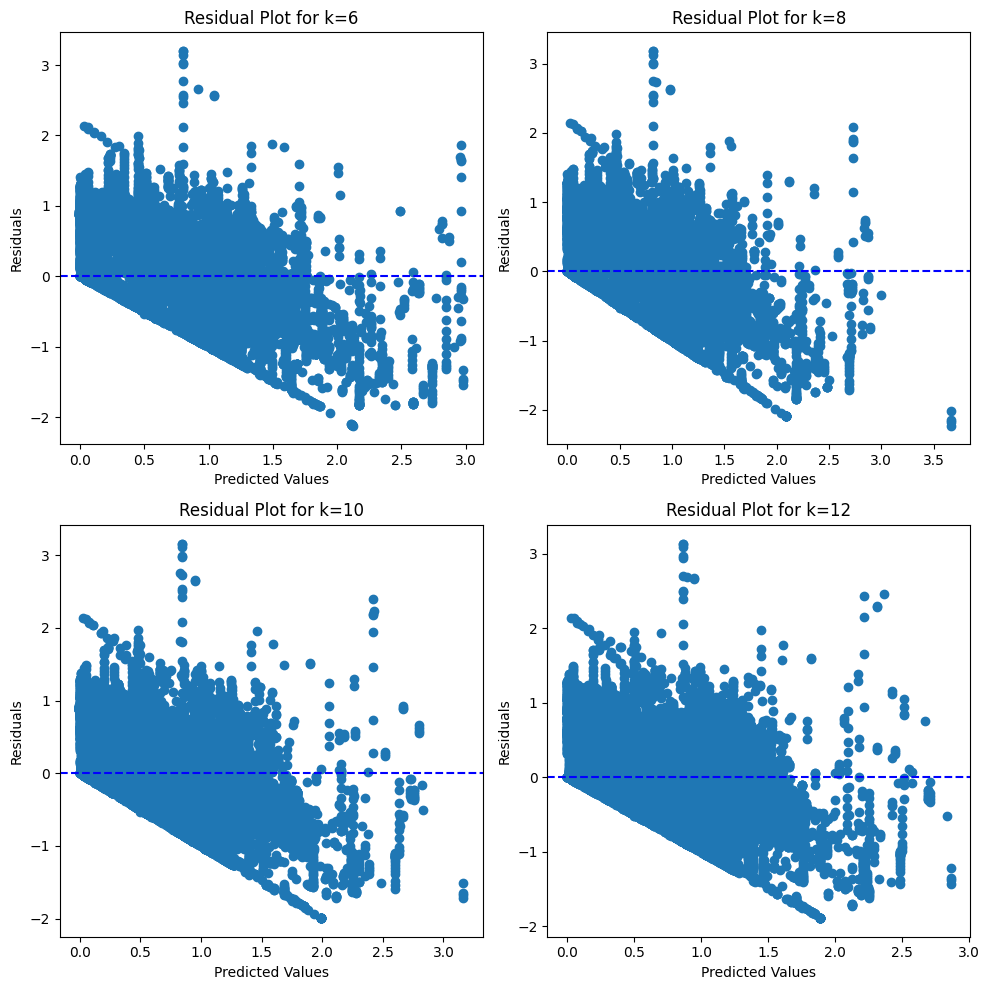

In [7]:
true_values = dep_test
residuals6 = true_values - prediction6
residuals8 = true_values - prediction8
residuals10 = true_values - prediction10
residuals12 = true_values - prediction12

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].scatter(prediction6, residuals6)
axes[0, 0].axhline(y=0, color='b', linestyle='--')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual Plot for k=6')

axes[0, 1].scatter(prediction8, residuals8)
axes[0, 1].axhline(y=0, color='b', linestyle='--')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot for k=8')

axes[1, 0].scatter(prediction10, residuals10)
axes[1, 0].axhline(y=0, color='b', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residual Plot for k=10')

axes[1, 1].scatter(prediction12, residuals12)
axes[1, 1].axhline(y=0, color='b', linestyle='--')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residual Plot for k=12')

plt.tight_layout()
plt.show()

The negative slope in the residuals suggests that the model is systematically under-predicting the higher values and possibly over-predicting some lower values. Equally the residuals fan out slightly as the predicted values increase. This phenomenon is called heteroscedasticity, where the error variance changes across the range of predicted values. In this case, it seems the model struggles more with larger predicted values. Additionally, we can see that all the graphs are relatively similar, indicating that the value of k is not having a huge impact on the accuracy of our model. 

## 5: Adjusting the hyperparameters

### 5.1: Adjusting metrics

We will now experiment with changing the metric to see how this affects the performance of our model. We will first try the Manhattan metric. The KNN model implicitly assumes that the distance between two points correlates to how similar they are. Thus, the Manhattan metric treats each dimension more equally than Euclidean distance by summing absolute distances (instead of squaring and square-rooting), and this makes it more robust to outliers since large distances do not have such a big impact on the metric.

Mean Squared Error for k=12 and Manhattan metric: 0.2001296475166079


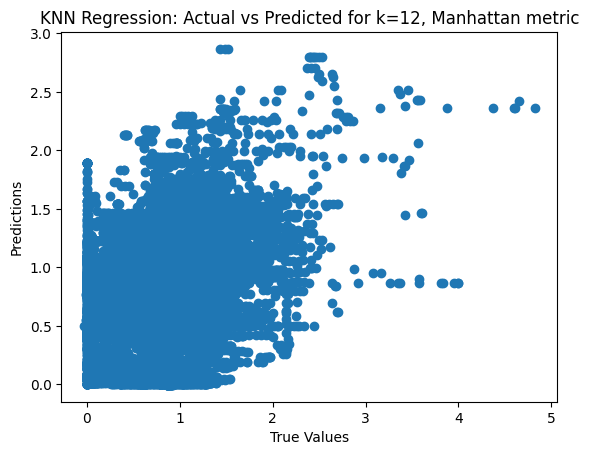

In [12]:
knn = KNeighborsRegressor(n_neighbors=12, p=1) 
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=12 and Manhattan metric: {mse}')

plt.scatter(dep_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("KNN Regression: Actual vs Predicted for k=12, Manhattan metric")
plt.show()

Again, we have a slightly smaller MSE using the Manhattan metric. This could be due to the fact that the Manhattan metric is generally more robust to outliers, or due to the fact that the Euclidean metric often struggles more with higher dimensions (in our case we have 9 independent variables, so 9 dimensions), again due to the fact that Euclidean distance calculates the square root of the sum of squares, and thus it somewhat distorts the distance between points in multiple dimensions.

### 5.2: Adjusting weighting and scaling

The next hyperparameters we will adjust are the scaling of the independent variables and the weighting of variables. By default, KNN assigns equal weight to all neighbors, however giving more weight to closer neighbors could improve model performance. In terms of scaling, the default scaler is the StandardScaler which transforms the data so that it has a mean of 0 and standard deviation of 1. Contrastingly the MinMaxScaler shifts and scales the features so that they fit within a specified range. While the StandardScaler is useful for data which follows a normal distribution, it doesn't preserve the relationship between original values and the distance between them. Unlike the others, RobustScaler is robust to outliers since it scales the data according to the interquartile range.

In [8]:
# First, we try MinMaxScaler

scaler = MinMaxScaler()
indep_scaled_train = scaler.fit_transform(indep_train)
indep_scaled_test = scaler.transform(indep_test)

knn = KNeighborsRegressor(n_neighbors=12, p=1)
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=12 and Manhattan metric, MinMaxScaler: {mse}')

# Now we will try RobustScaler

scaler = RobustScaler()

indep_scaled_train = scaler.fit_transform(indep_train)
indep_scaled_test = scaler.transform(indep_test)

knn = KNeighborsRegressor(n_neighbors=12, p=1)
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=12 and Manhattan metric, RobustScaler: {mse}')

Mean Squared Error for k=12 and Manhattan metric, MinMaxScaler: 0.1968844662728391
Mean Squared Error for k=12 and Manhattan metric, RobustScaler: 0.19400473406788432


As we can see, RobustScaler performs best for our features, potentially due to the existence of outliers. We will now try changing the weighting.

In [9]:
knn = KNeighborsRegressor(n_neighbors=12, p=1, weights='distance') 
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=12 and Manhattan metric, RobustScaler, weighted: {mse}')

Mean Squared Error for k=12 and Manhattan metric, RobustScaler, weighted: 0.19434706778360736


This MSE is slightly worse. In the default weight setting (weight="uniform"), all neighbours contribute equally to the weight setting, regardless of their distance from the target point. However, in the weight setting weights="distance", neighbours that are closer to the target point are given proportionally more weight than neighbours which are farther away. Thus, for regression, the predicted value is the weighted average of the neighbour's values. The fact that the uniform weight performs better suggests that potentially the neighbours are equally relevant, or that we have a relatively even distribution of data points.

## 6: Cross-validation and dimensionality reduction

### 6.1: Cross-validation

Next we will consider k-fold cross-validation in order to evaluate the model's performance more robustly.

In [10]:
knn = KNeighborsRegressor(n_neighbors=12, p=1, weights='distance') 
scores = cross_val_score(knn, indep_scaled_train, dep_train, cv=3, scoring='neg_mean_squared_error')
average_mse = -scores.mean()
print(f"Average MSE from 3-fold cross-validation: {average_mse}")

Average MSE from 3-fold cross-validation: 0.21277748885071882


### 6.2: Recresive Feature Elimination

The next way we can optimise our model is to consider variable selection using recursive feature elimination (RFE). One of the main benefits of feature selection is that it can reduce the dimensionality of the dataset which makes the algorithm more computationally efficient and can reduce overfitting. RFE recursively removes the least important features and re-trains the model at each step. Since KNN does not inherently provide a way to rank the importance of features, we will also include a linear model to aid with variable selection.

In [11]:
base_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=12, p=1, weights = 'uniform')

rfe = RFE(estimator=base_model, n_features_to_select=3)
rfe.fit(indep_scaled_train, dep_train)
train_rfe = rfe.transform(indep_scaled_train)
test_rfe = rfe.transform(indep_scaled_test)

# RFE and selects important features using the linear regression model
# Now we test the KNN model using these variables

knn_model.fit(train_rfe, dep_train)
predictions = knn_model.predict(test_rfe)
mse = mean_squared_error(dep_test, predictions)

print(f'Mean Squared Error for k=20, p=1, weights="uniform", with selected features: {mse}')
print(f'Selected Features: {rfe.support_}')

Mean Squared Error for k=20, p=1, weights="uniform", with selected features: 0.2455706810227868
Selected Features: [False  True  True  True False False False False False]


RFE selects the statistically significant variables to be: 'CH Index', 'Gov Resp Index', 'Econ Sup Index'. We will now test the performance of our model under 3-fold cross validation using only these variables to see if this gives a smaller MSE.

In [12]:
indep_train_vs = train_data[['CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index']]
indep_test_vs = test_data[['CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index']]

scaler = RobustScaler()
indep_scaled_train_vs = scaler.fit_transform(indep_train_vs)
indep_scaled_test_vs = scaler.transform(indep_test_vs)

knn = KNeighborsRegressor(n_neighbors=12, p=1, weights='distance')

scores_vs = cross_val_score(knn, indep_scaled_train_vs, dep_train, cv=3, scoring='neg_mean_squared_error')
average_mse = -scores_vs.mean()
print(f"Average MSE from 3-fold cross-validation, with variable selection: {average_mse}")

Average MSE from 3-fold cross-validation, with variable selection: 0.2481109608823211


This model using RFE performs worse according to our metric of MSE. We will now try an alternative method for variable selection, Principal Component Analysis (PCA). PCA reduces the number of features by transforming the original features into a new set of variables (principal components) that still capture most of the variance in the data. Also PCA is a linear transformation, which means it works best when the relationship between the features and the target variable is approximately linear. Note than we will choose the n_component to be 0.95, which means that we retain 95% of the variance in the data.

### 6.3: Principal Component Analysis

In [22]:
knn = KNeighborsRegressor(n_neighbors=12, p=1, weights='distance')

pca = PCA(n_components=0.95)
pca_train = pca.fit_transform(indep_scaled_train)
pca_test = pca.transform(indep_scaled_test)

scores_pca = cross_val_score(knn, pca_train, dep_train, cv=3, scoring='neg_mean_squared_error')
average_mse_pca = -scores_pca.mean()

print(f"Average MSE from 3-fold cross-validation with PCA: {average_mse_pca}")

# We can also train on the full data now, and test on the test data

knn.fit(pca_train, dep_train)
predictions_pca = knn.predict(pca_test)
mse_test_pca = mean_squared_error(dep_test, predictions_pca)

print(f"Test MSE with PCA: {mse_test_pca}")

Average MSE from 3-fold cross-validation with PCA: 0.2197637237806782
Test MSE with PCA: 0.22176521483504344


This MSE is slightly better than the MSE from using RFE, but still worse than the previous model without dimensionality reduction.

In [23]:
print(f"Variance explained by each component: {pca.explained_variance_ratio_}")
print(f"Number of components selected: {pca.n_components_}") 
loadings = pca.components_  # Each row corresponds to a principal component
print(loadings)

Variance explained by each component: [0.99999039]
Number of components selected: 1
[[1.36732378e-08 5.95341132e-08 6.51313856e-08 4.49604684e-08
  7.57580949e-08 5.61999130e-06 2.56293246e-06 9.99999752e-01
  7.04153578e-04]]


Since components are linear components of the original features, the matrix above shows the weightings of each of the original independent variables in each of the new components. We can see that there is only one row, so only one component has been selected, and this accounts for 0.99% of the variance in the data. The array shows that the second last variable (new_cases) contributes the most. In a machine learning context, variance refers to how much the data points vary from the mean, and thus it measures the extent to which the values of a feature differ from their average value. Variance is important because our goal is to reduce the dimensionality of our dataset as much as possible, while preserving as much of the variance as possible.

### 6.4: A closer look at the number of neighbors

Note that if we dramatically increase the number of neighbors, the MSE does decrease. However, there is research to suggest that often KNN becomes increasingly meaningless as the number of neighbors increases, since the distance between the nearest and farthest neighbors converges.

In [24]:
knn = KNeighborsRegressor(n_neighbors=50, p=1, weights='distance') 
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=50 and Manhattan metric, RobustScaler, weighted: {mse}')

knn = KNeighborsRegressor(n_neighbors=100, p=1, weights='distance') 
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=100 and Manhattan metric, RobustScaler, weighted: {mse}')

Mean Squared Error for k=50 and Manhattan metric, RobustScaler, weighted: 0.1559456308781362
Mean Squared Error for k=100 and Manhattan metric, RobustScaler, weighted: 0.1414827146696263


## 7: Ensemble methods and alternative methods relating to KNN

Since our KNN model does not show much improvement unless we dramatically increase the number of neighbors, we will also try an alternative modelling technique, which is still related to KNN, called the Parzen Window Method, or Kernel Density Estimation (KDE).

### 7.1: Kernel Density Estimation

KNN regression can be seen as a special case of KDE. In KDE, the idea is to place a kernel function (often a Gaussian) at each data point, and sum the contributions from each kernel to provide a smooth estimate of the underlying distribution. In our case of regression, KDE makes predictions by averaging the values of the function weighted by the kernels centred at the query points. While KNN selects the k nearest data points and uses their average values to make predictions, KDE applies a weighted average, where contributions from data points are determined by a kernel function which diminishes with distance from the query point.

In [87]:
knn = KNeighborsRegressor(n_neighbors=15, p=1, weights='distance') 

scaler = RobustScaler()
indep_scaled_train = scaler.fit_transform(indep_train)
indep_scaled_test = scaler.transform(indep_test)

pca = PCA(n_components=9)
indep_pca_train = pca.fit_transform(indep_scaled_train)
indep_pca_test = pca.transform(indep_scaled_test)

nystroem = Nystroem(kernel='rbf', gamma=0.05, n_components=700)
indep_nystroem_train = nystroem.fit_transform(indep_pca_train)
indep_nystroem_test = nystroem.transform(indep_pca_test)

ridge = Ridge(alpha=1.2)
ridge.fit(indep_nystroem_train, dep_train)

prediction_parzen = ridge.predict(indep_nystroem_test)
mse_parzen = mean_squared_error(dep_test, prediction_parzen)
print(f'Mean Squared Error for Approximate Parzen-like Ridge Regression: {mse_parzen}')

Mean Squared Error for Approximate Parzen-like Ridge Regression: 0.12575765839984598


### 7.2: XGBoosting

Another technique to improve model performance is XGBoosting. XGBoosting is an ensemble machine learning algorithm which implements gradient boosted decision trees with regularisation. We can combine XGBoosting with our KNN model using a voting regressor. The voting regressor simply uses the average prediction from both models as its final prediction. 

In [51]:
knn = KNeighborsRegressor(n_neighbors=15, p=1, weights='distance') 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=5)
ensemble_model = VotingRegressor(estimators=[('knn', knn_model), ('xgb', xgb_model)])
ensemble_model.fit(indep_scaled_train, dep_train)
prediction = ensemble_model.predict(indep_scaled_test)
mse = mean_squared_error(dep_test, prediction)
print(f"Mean Squared Error with voting regressor: {mse}")

Mean Squared Error with voting regressor: 0.12946495698252142


## 8: Final visualisation

Finally we will show the performance of the ensemble model using XGBoost and KNN. We will use a residuals plot and a scatter graph to visualise 


## 9: Conclusion

We have considered a variety of hyperparameters for our KNN model, such as weight, metric, value of k and scaling, and we have seen how they affect the performance of our model. Overall, we have seen that the model performs best using the hyperparameters: Uniform weight, Manhattan metric, Robust scaling, and a higher k value. We then investigated the use of RFE and PCA for variable selection, and we determined that PCA is more effective for reducing the MSE of our model. Finally, we tried using other methods such as the Parzen Window method and XGBoosting combined with KNN, which were the most effective at reducing the MSE.

## References

[Medium](https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4) - Distance Metrics and K-Nearest Neighbor

[Hilaris](https://www.hilarispublisher.com/open-access/kminusnearest-neighbours-and-kminusfold-cross-validation-for-big-data-of-covid-19-95348.html) - Cross validation for big data

[Arize](https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/) - Deep Dive on KNN

[Medium](https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f) - Justification of MSE

[Sebastian Raschka](https://sebastianraschka.com/Articles/2014_kernel_density_est.html) - Kernel Density Estimation using Parzen-Rozenblatt window method